In [3]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt

In [4]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10,6)

## Distinguishing Coke and Pespi by taste

It has been said that it is difficult to distinguish Coke and Pepsi by taste alone, whitout the visual cue of the bottle or can.

In an experiment that I did in a class at Stanford, 10 cups were filled at random with either Coke or Pepsi. A student volunteer tasted each of the 10 cups and correctly named the contents of seven. Is this sufficient evidence to conclude that the student can tell apart Coke and Pepsi?

"Nothing extraordinary is going on" means that the stundent does not have any special ability to tell them apart and is just guessing.

To write this down formally we introduce 0/1 labels since we are counting correct answers: 1=correct answer, 0=wrong answer.

$H_0: P(0) = P(1) = \frac{1}{2} {~~~~~~} H_A: P(1) > 1/2$

This is a one-sided test: the alternative hypothesis for P(1) we are interested in is on one side of $\frac{1}{2}$

Since we are looking at the sum of ten 0/1 labels, the z-statistic is the same that we had for coin-tossing:

$$z = \frac{{observed~sum} - {expected~sum}}{SE~of~sum} = \frac{7-5}{1.58} = 1.27$$

But since we do a one-sided test instead of a two-sed test, the p-value is only half as large:

Since 10.2% is not smaller than 5%, we don't reject $H_0$: We are not convinced that the student can distinguish Coke and Pepsi.

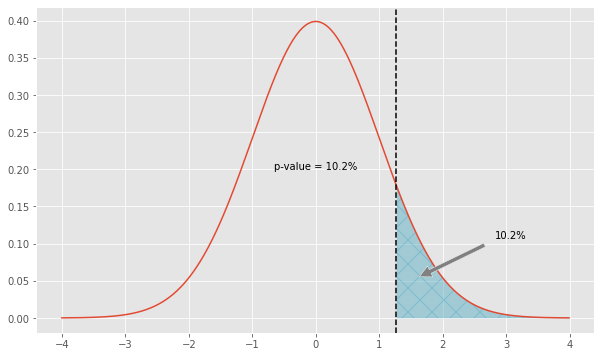

In [9]:

mu = 0
variance = 1
sigma = math.sqrt(variance)

# Create the curve from -4σ to 4σ
x = np.arange(mu - 4*sigma, mu + 4*sigma, 0.01)
y = norm.pdf(x, mu, sigma)

ax = sns.lineplot(x=x, y=y)
kde_x, kde_y = ax.lines[0].get_data()

lb = 1.27

ax.axvline(lb, color = 'k', linestyle="--")

_ = ax.fill_between(kde_x, kde_y, 
where=(kde_x > lb) , 
interpolate=True, color='#5fb0c7', hatch= 'x', alpha=0.50)


_ = ax.annotate("10.2%", xy=(1.5, 0.05),  xycoords='data',
            xytext=(0.85, 0.30), textcoords='axes fraction',
            arrowprops=dict(facecolor='gray', shrink=0.1),
            horizontalalignment='center', verticalalignment='center',
            )

_ = ax.annotate(f'p-value = 10.2%', xy=(0.0, 0.2), horizontalalignment='center')

A two-sided alternative might also be appropriate:

$H_A: P(1) \neq \frac{1}{2}$

$H_A$ corresponnds to a student who is likely than not to distinguish Coke and Pepsi, but who may confuse them. Such a student might get one correct answer (say).

One has to carrefully consider whether the alternative should be one-sided or two-sided, as the p-value gets doubled in the latter case.

It is not ok to change the alternative aftewards in order to get the p-value below 5%.